# 주가 데이터 가져오기

주가 데이터는 FinanceDataReader 패키지를 이용하면 쉽게 가져올 수 있습니다. 패키지에 대한 설명은 아래 주소에서 확인해보세요. https://github.com/FinanceData/FinanceDataReader
    
패키지 설치는 아래 명령어를 복사해 주피터 노트북에서 실행시키면 됩니다.

    !pip install finance_datareader

In [2]:
import FinanceDataReader as fdr

# 국내 상장된 ETF 목록을 불러올 수 있습니다.
df_etf = fdr.EtfListing('KR')
df_etf.head()

,Symbol,Name
0,069500,KODEX 200
1,102110,TIGER 200
2,122630,KODEX 레버리지
3,278540,KODEX MSCI Korea TR
4,102780,KODEX 삼성그룹


In [3]:
# TIGER 200의 종목코드를 확인하고, 데이터를 가져옵니다.
df_tiger200 = fdr.DataReader('102110', start='2012-01-01', end='2019-12-31')
df_tiger200.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2012-01-02,21197,21197,20873,21061,165762,0.000000
2012-01-03,21197,21710,21197,21722,365936,0.031385
2012-01-04,21808,21808,21582,21597,129764,-0.005755
2012-01-05,21590,21697,21507,21548,1532245,-0.002269
2012-01-06,21371,21564,20970,21229,282066,-0.014804


In [4]:
# 특정 기간의 데이터만 잘라서 보고 싶을 때
from datetime import date
df_tiger200.loc[date(2012, 12, 22):date(2013, 1, 10)]

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2012-12-24,23270,23274,23175,23264,624006,0.003061
2012-12-26,23282,23478,23221,23251,989276,-0.000559
2012-12-27,23304,23430,23207,23401,2552681,0.006451
2012-12-28,23455,23585,23417,23534,602935,0.005684
2013-01-02,23754,23991,23562,23978,1310370,0.018866
2013-01-03,24035,24172,23869,23875,1106981,-0.004296
2013-01-04,23869,23936,23695,23754,1447398,-0.005068
2013-01-07,23855,23855,23592,23793,750783,0.001642
2013-01-08,23641,23736,23534,23547,1067576,-0.010339


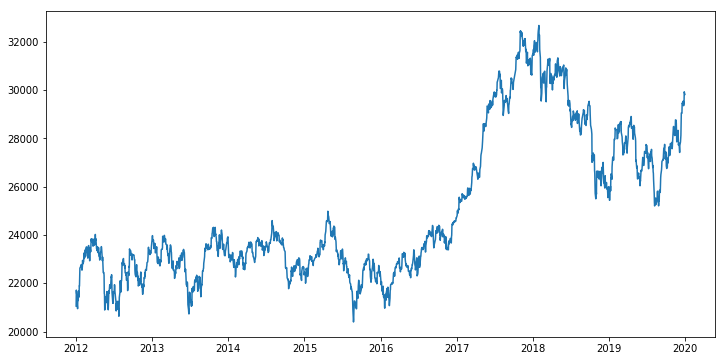

In [6]:
# 타이거 200의 종가 그래프를 그립니다.

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6)) # 판의 크기를 키웁니다.
plt.plot(df_tiger200['Close'], label='tiger200')
plt.show()

데이터 프레임이나 시리즈 객체의 `.rolling(window).mean()` 메서드를 이용하면 이동평균선을 구할 수 있습니다. 예를 들어 window가 10인 경우, 오늘을 포함한 과거 10치 주가의 평균을 구해줍니다.

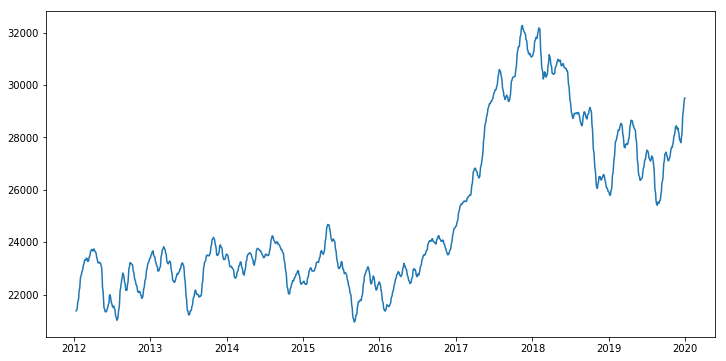

In [7]:
df_tiger200_moving_avg = df_tiger200['Close'].rolling(10).mean()
plt.figure(figsize=(12, 6)) # 판의 크기를 키웁니다.
plt.plot(df_tiger200_moving_avg, label='tiger200')
plt.show()

# 종가 테이블
여러 종목을 한번에 분석하기 위해 하나의 표로 정리하는 것이 좋습니다. TIGER200(102110), 삼성전자(005930), SK하이닉스(000660), 현대자동차(005380) 데이터를 가져와서 아래와 같이 종목별 종가 테이블 형태을 만들겠습니다.

In [8]:
import pandas as pd
symbol_list = ['102110', '005930', '000660', '005380']

data_dict = {}
for symbol in symbol_list:
    data_dict[symbol] = fdr.DataReader(symbol, start='2012-01-01', end='2019-12-31')
close_df = pd.DataFrame({k:v['Close'] for k, v in data_dict.items()})

close_df.head()

,102110,005930,000660,005380
Date,,,,
2012-01-02,21061,21600,23450,212500
2012-01-03,21722,22100,23650,221500
2012-01-04,21597,21600,23850,223500
2012-01-05,21548,21100,24000,223500
2012-01-06,21229,20800,24400,219500


# 수익률 테이블

위에서 구한 `close_df`를 토대로 일별 수익률 테이블을 만들어보겠습니다.

참고로 수익률을 구하는 공식은 다음과 같습니다. $X_0$을 투자해서 $X_1$을 벌었다고 할 때의 수익률은, 

- $\frac{X_1}{X_0} - 1$

입니다. 일별 수익률을 계산할 때 $X_0$은 어제의 종가이고 $X_1$은 오늘의 종가가 됩니다.

In [8]:
# shift 메서드는 표를 한 칸씩 밑으로 내려가게 만듭니다. (실험해보세요!)
change_df = close_df / close_df.shift(1) - 1
change_df.head()

,102110,005930,000660,005380
Date,,,,
2012-01-02,NaN,NaN,NaN,NaN
2012-01-03,0.031385,0.023148,0.008529,0.042353
2012-01-04,-0.005755,-0.022624,0.008457,0.009029
2012-01-05,-0.002269,-0.023148,0.006289,0.000000
2012-01-06,-0.014804,-0.014218,0.016667,-0.017897


## pct_change()

위 방법처럼 공식으로 구하는 것도 좋지만, 수익률을 구하는 더 쉬운 방법은 `.pct_change(periods)` 메서드를 이용하는 것입니다. `.pct_change(periods)`는 `periods` 동안의 수익률을 구해줍니다. 예를 들어, `periods = 5`이면, 5일 동안의 수익률을 구해줍니다. 

In [13]:
change_df = close_df.pct_change(1)
change_df.head()

,102110,005930,000660,005380
Date,,,,
2012-01-02,NaN,NaN,NaN,NaN
2012-01-03,0.031385,0.023148,0.008529,0.042353
2012-01-04,-0.005755,-0.022624,0.008457,0.009029
2012-01-05,-0.002269,-0.023148,0.006289,0.000000
2012-01-06,-0.014804,-0.014218,0.016667,-0.017897


# 공분산, 상관관계 구하기

In [9]:
# 공분산 구하기
change_df.cov()

,102110,005930,000660,005380
102110,0.000067,0.000096,0.000090,0.000059
005930,0.000096,0.000267,0.000150,0.000052
000660,0.000090,0.000150,0.000473,0.000045
005380,0.000059,0.000052,0.000045,0.000324


`.corr()` 메서드를 통해 상관관계를 구할 수 있습니다. 상관관계는 수익률이 종목별로 서로 얼마나 관련되어 있는지를 수치적으로 보는 건데요, 1에 가까울 수록 상관관계가 높다고 합니다.

상관관계를 구한 후, 이를 시각적으로 표현하기 위해 `plt.matshow()`를 이용했습니다. (행렬을 그림으로 표현해줄 때 이용합니다.)

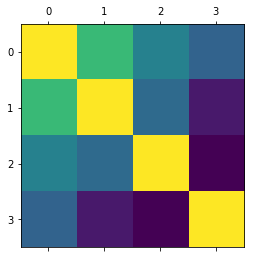

In [10]:
plt.matshow(change_df.corr())
plt.show()

# 로그 수익률 구하기

수익률을 로그 수익률로 계산하면 여러 가지 계산상의 이점이 있습니다. 로그 수익률은 다음과 같이 구합니다. 즉 1을 더해준 뒤, 자연상수 $e$를 밑으로 하는 로그를 취해주면 됩니다.

+ $r_{log} = \ln (r+1)$

거꾸로 로그 수익률을 일반적인 수익률로 바꿔줄 때는 다음 공식을 사용합니다.

- $e^{r_{log}}-1$


로그 수익률을 이용하는 방법에는 여러 가지가 있지만, 복리를 계산할 때 편리합니다. 로그 수익률이 아닌, 일반적인 수익률로 복리를 계산하려면 다음과 같이 해야 합니다.

- $r_{(3days)} = (r_{(1)}+1)(r_{(2)}+1)(r_{(3)}+1)-1$

반면 로그의 성질에 의해, 3일치 로그 수익률은 그저 더하기만 하면 됩니다.

- $r_{log(3days)} = r_{log(1)}+r_{log(2)}+r_{log(3)}-1$

3일치 로그 수익률을 구한 다음에는 아래처럼 일반적인 수익률로 다시 변환하면 3일치 수익률을 구할 수 있습니다.

- $r_{(3days)} = e^{r_{log(3days)}}-1$

아래에서 코드로 실습해보겠습니다.

In [11]:
# 로그 수익률 구하기
import numpy as np
log_returns = np.log(change_df+1)

In [12]:
# log_returns.sum()으로 합계 계산 후, 일반 수익률로 다시 변환하기
returns = np.exp(log_returns.sum())-1

# 2012~2019년 동안의 수익률입니다.
returns

102110    0.415887
005930    1.583333
000660    3.012793
005380   -0.432941
dtype: float64

# 연도별 수익률 구하기
로그 수익률 계산법을 응용해 연도별 수익률을 계산해보겠습니다. 

`map` 함수는 https://dojang.io/mod/page/view.php?id=2286 에 사용법이 나와있습니다.

In [13]:
import numpy as np
change_df_new = change_df.copy()
change_df_new.index = map(lambda x: x.strftime("%Y"), change_df.index)
np.exp(change_df_new.groupby(change_df_new.index).sum())-1

,102110,005930,000660,005380
2012,0.132196,0.475516,0.176957,0.072839
2013,0.025536,-0.071788,0.495735,0.124899
2014,-0.060563,-0.003905,0.365066,-0.252548
2015,0.012011,-0.017804,-0.312847,-0.075889
2016,0.108193,0.482588,0.532477,0.009732
2017,0.278056,0.453507,0.815322,0.113388
2018,-0.163760,-0.213699,-0.158596,-0.204829
2019,0.156850,0.479904,0.652223,0.045925
